<a href="https://colab.research.google.com/github/Cattum/INFOSCI-301-Team-Research/blob/main/Appendix_charts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

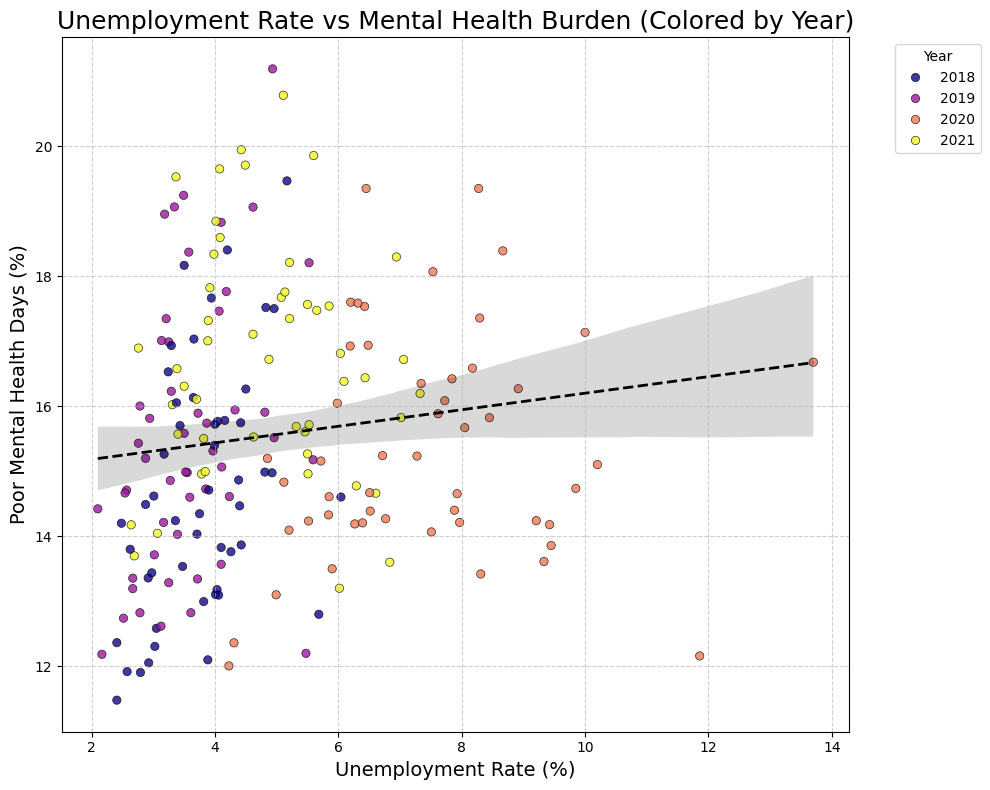

<ipython-input-15-847a5e770439>:66: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-15-847a5e770439>:66: UserWarning:

Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14



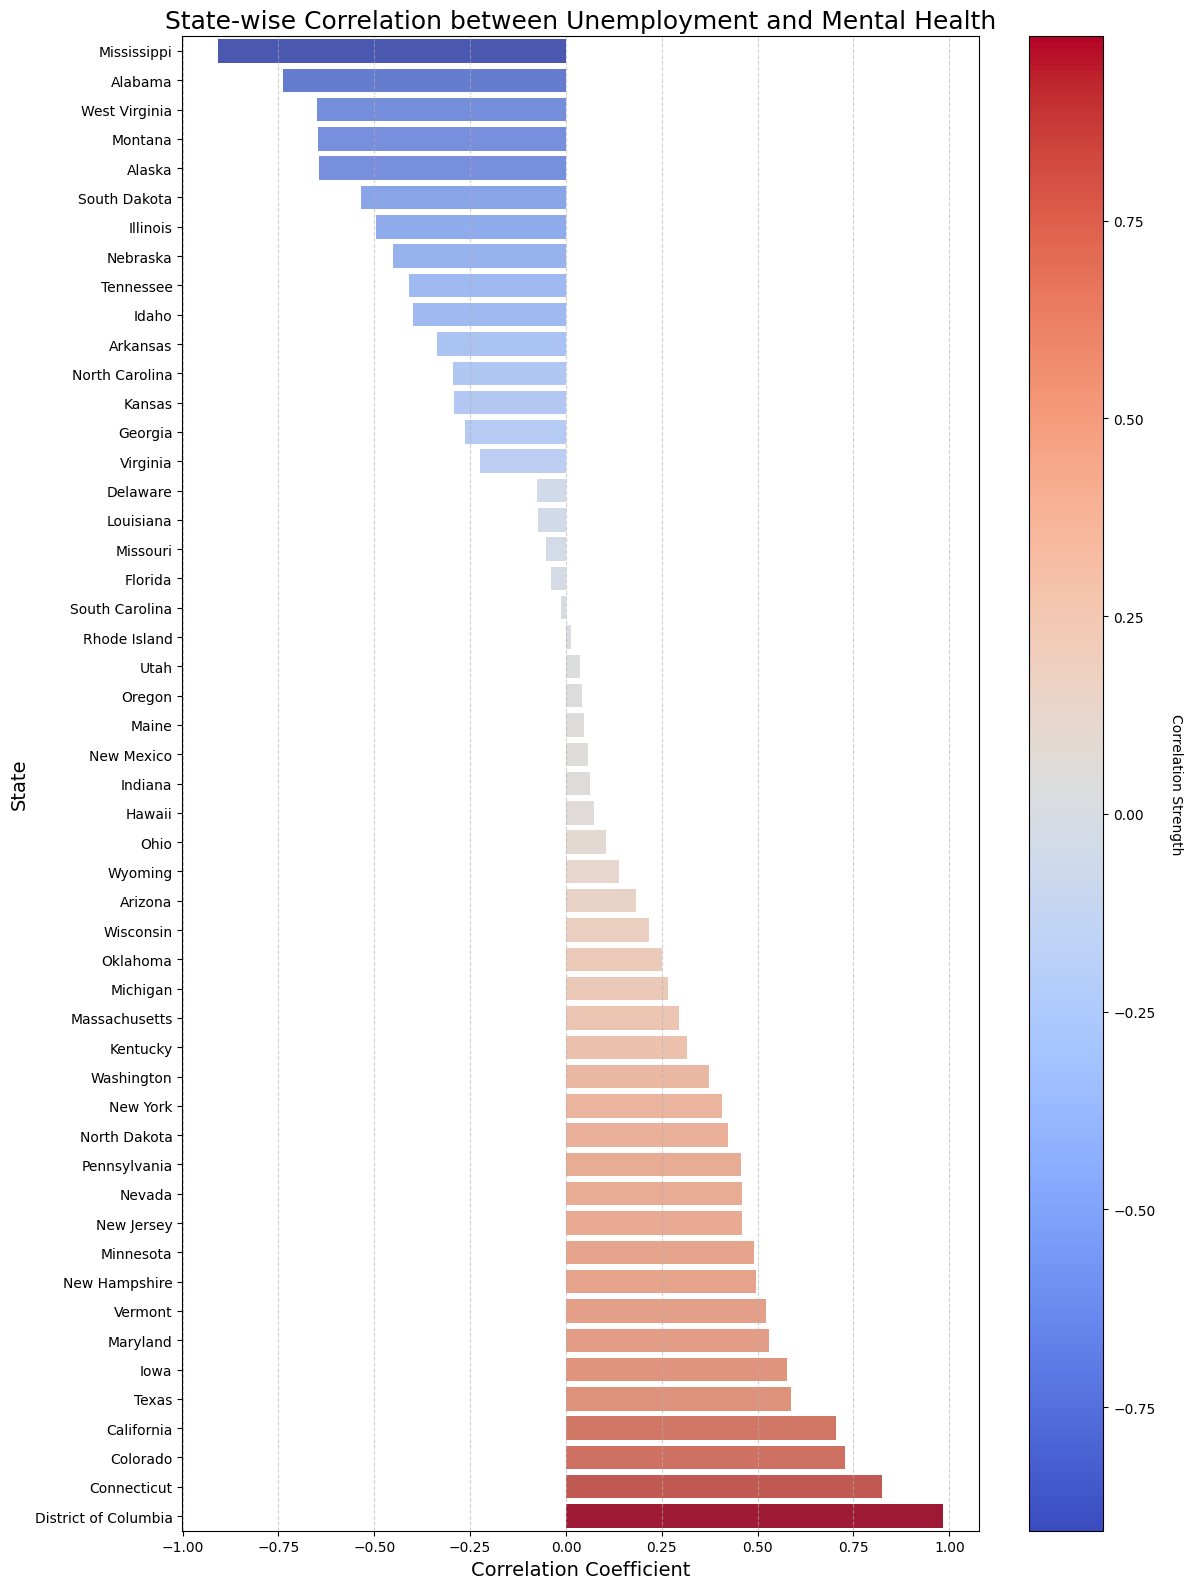

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import pearsonr
import matplotlib as mpl

url = 'https://raw.githubusercontent.com/Cattum/INFOSCI-301-Team-Research/refs/heads/main/metadata/partial_combined_data.csv'
df = pd.read_csv(url)
df = df.dropna()

if 'Year' not in df.columns:
    print("警告：数据中没有 'Year' 列。请检查数据！")

# ===============================
# 1. Overall unemployment rate vs. mental health burden
# ===============================
plt.figure(figsize=(10,8))
scatter = sns.scatterplot(
    data=df,
    x='Unemployment Rate',
    y='Value',
    hue='Year',
    palette='plasma',
    alpha=0.8,
    edgecolor='black',
    linewidth=0.5
)
sns.regplot(
    data=df,
    x='Unemployment Rate',
    y='Value',
    scatter=False,
    color='black',
    line_kws={"linewidth":2, "linestyle":"dashed"}
)

plt.title('Unemployment Rate vs Mental Health Burden (Colored by Year)', fontsize=18)
plt.xlabel('Unemployment Rate (%)', fontsize=14)
plt.ylabel('Poor Mental Health Days (%)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('overall_scatter_by_year.png', dpi=300)
plt.show()

# ===============================
# 2. State-wise correlation sensitivity ranking
# ===============================
state_corrs = []
for state, group in df.groupby('State'):
    if len(group) >= 2:
        corr, _ = pearsonr(group['Unemployment Rate'], group['Value'])
        state_corrs.append((state, corr))

state_corrs_df = pd.DataFrame(state_corrs, columns=['State', 'Correlation'])

state_corrs_df_sorted = state_corrs_df.sort_values('Correlation')

fig, ax = plt.subplots(figsize=(12, 16))

norm = mpl.colors.Normalize(vmin=state_corrs_df_sorted['Correlation'].min(), vmax=state_corrs_df_sorted['Correlation'].max())
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)
bar_colors = plt.cm.coolwarm(norm(state_corrs_df_sorted['Correlation']))

sns.barplot(
    data=state_corrs_df_sorted,
    x='Correlation',
    y='State',
    palette=bar_colors,
    ax=ax
)

ax.set_title('State-wise Correlation between Unemployment and Mental Health', fontsize=18)
ax.set_xlabel('Correlation Coefficient', fontsize=14)
ax.set_ylabel('State', fontsize=14)
ax.grid(True, axis='x', linestyle='--', alpha=0.6)

cbar = fig.colorbar(sm, ax=ax, orientation='vertical')
cbar.set_label('Correlation Strength', rotation=270, labelpad=20)

plt.tight_layout()
plt.savefig('statewise_correlation.png', dpi=300)
plt.show()


# ===============================
# 3.Choropleth Map
# ===============================

import plotly.express as px

us_state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}
state_corrs_df['State_Abbrev'] = state_corrs_df['State'].map(us_state_abbrev)

tealrose_hex = [
    "#008080", "#319795", "#4FD1C5", "#81E6D9", "#B2F5EA",
    "#EDF2F7", "#FED7E2", "#FBB6CE", "#F687B3", "#ED64A6"
]

fig = px.choropleth(
    state_corrs_df,
    locations='State_Abbrev',
    locationmode="USA-states",
    color='Correlation',
    color_continuous_scale=tealrose_hex,
    scope="usa",
    title="State-wise Correlation: Unemployment vs Mental Health (Tealrose Style)",
    color_continuous_midpoint=0
)

fig.update_layout(
    geo=dict(
        showlakes=True,
        lakecolor='lightblue',
        bgcolor='white',
        landcolor='whitesmoke',
        showland=True
    ),
    font=dict(
        family="Arial",
        size=14,
        color="black"
    ),
    margin={"r":0,"t":50,"l":0,"b":0},
    title_x=0.5,
    coloraxis_colorbar=dict(
        title="Correlation",
        ticks="outside",
        ticklen=3
    )
)

fig.write_html('us_correlation_map.html')
fig.show()